In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [ ]:
path_df = '/content/gdrive/My Drive/drug.xlsx'
df = pd.read_excel(path_df)
df.head(5)

Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [ ]:
df['Sex'] = df['Sex'].replace(['F','M'],[0,1])
df['BP'] = df['BP'].replace(['HIGH' , 'LOW', 'NORMAL'],[0 , 1 , 2])
df['Cholesterol'] = df['Cholesterol'].replace(['HIGH' , 'NORMAL'],[0,1])
df['Drug'] = df['Drug'].replace(['drugA' , 'drugB' , 'drugC' , 'drugX' , 'drugY'],[0,1,2,3,4])

In [ ]:
df.head()

Age  Sex  BP  Cholesterol        Na         K  Drug
0   23    0   0            0  0.792535  0.031258     4
1   47    1   1            0  0.739309  0.056468     2
2   47    1   1            0  0.697269  0.068944     2
3   28    0   2            0  0.563682  0.072289     3
4   61    0   1            0  0.559294  0.030998     4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.1 KB


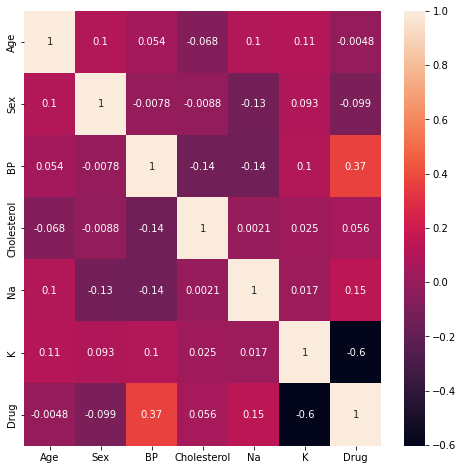

In [ ]:
corrmat = df.corr()
top_corr_featurs = corrmat.index
plt.figure(figsize=(8,8))
g = sns.heatmap(df[top_corr_featurs].corr() , annot=True)
plt.show()

In [ ]:
df['Cholesterol_BP'] = df['Cholesterol'] * df['BP']

In [ ]:
y=df['Drug']

In [ ]:
df.drop(['Drug'], axis = 1 , inplace=True)

In [ ]:
df.drop(['Age'], axis = 1 , inplace = True)
df.drop(['Sex'] , axis = 1 , inplace=True)
df.drop(['Cholesterol'], axis = 1 , inplace = True)

In [ ]:
df.head()

BP        Na         K  Cholesterol_BP
0   0  0.792535  0.031258               0
1   1  0.739309  0.056468               0
2   1  0.697269  0.068944               0
3   2  0.563682  0.072289               0
4   1  0.559294  0.030998               0

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df, y, train_size = 0.8 , test_size=0.2 , random_state=0)

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(x_train , y_train)
y_pred = decision_tree.predict(x_test)

In [ ]:
acc_decision_tree = round(decision_tree.score(x_train , y_train)*100 , 2)
acc_decision_tree

92.5

In [ ]:
SqErr = mean_squared_error(y_test, y_pred)
print('mean_squared_error : ', SqErr)

mean_squared_error :  0.075


In [ ]:
cn = ['drugA' ,  'drugB' , 'drugC' , 'drugX' , 'drugY']

In [ ]:
df.columns

Index(['BP', 'Na', 'K', 'Cholesterol_BP'], dtype='object')

In [ ]:
feature = ['BP' , 'Na', 'K', 'Cholesterol_BP' ]

In [ ]:
text_representation = tree.export_text(decision_tree , feature_names=feature)
print(text_representation)

|--- K <= 0.05
|   |--- K <= 0.04
|   |   |--- class: 4
|   |--- K >  0.04
|   |   |--- Na <= 0.66
|   |   |   |--- BP <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- BP >  0.50
|   |   |   |   |--- K <= 0.04
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- K >  0.04
|   |   |   |   |   |--- class: 3
|   |   |--- Na >  0.66
|   |   |   |--- Na <= 0.68
|   |   |   |   |--- Na <= 0.66
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Na >  0.66
|   |   |   |   |   |--- class: 1
|   |   |   |--- Na >  0.68
|   |   |   |   |--- class: 4
|--- K >  0.05
|   |--- BP <= 0.50
|   |   |--- K <= 0.05
|   |   |   |--- K <= 0.05
|   |   |   |   |--- class: 0
|   |   |   |--- K >  0.05
|   |   |   |   |--- class: 4
|   |   |--- K >  0.05
|   |   |   |--- Na <= 0.58
|   |   |   |   |--- class: 0
|   |   |   |--- Na >  0.58
|   |   |   |   |--- K <= 0.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- K >  0.06
|   |   |   |   |   |--- class: 0
|   |--- BP >  0.50
|   |   |---

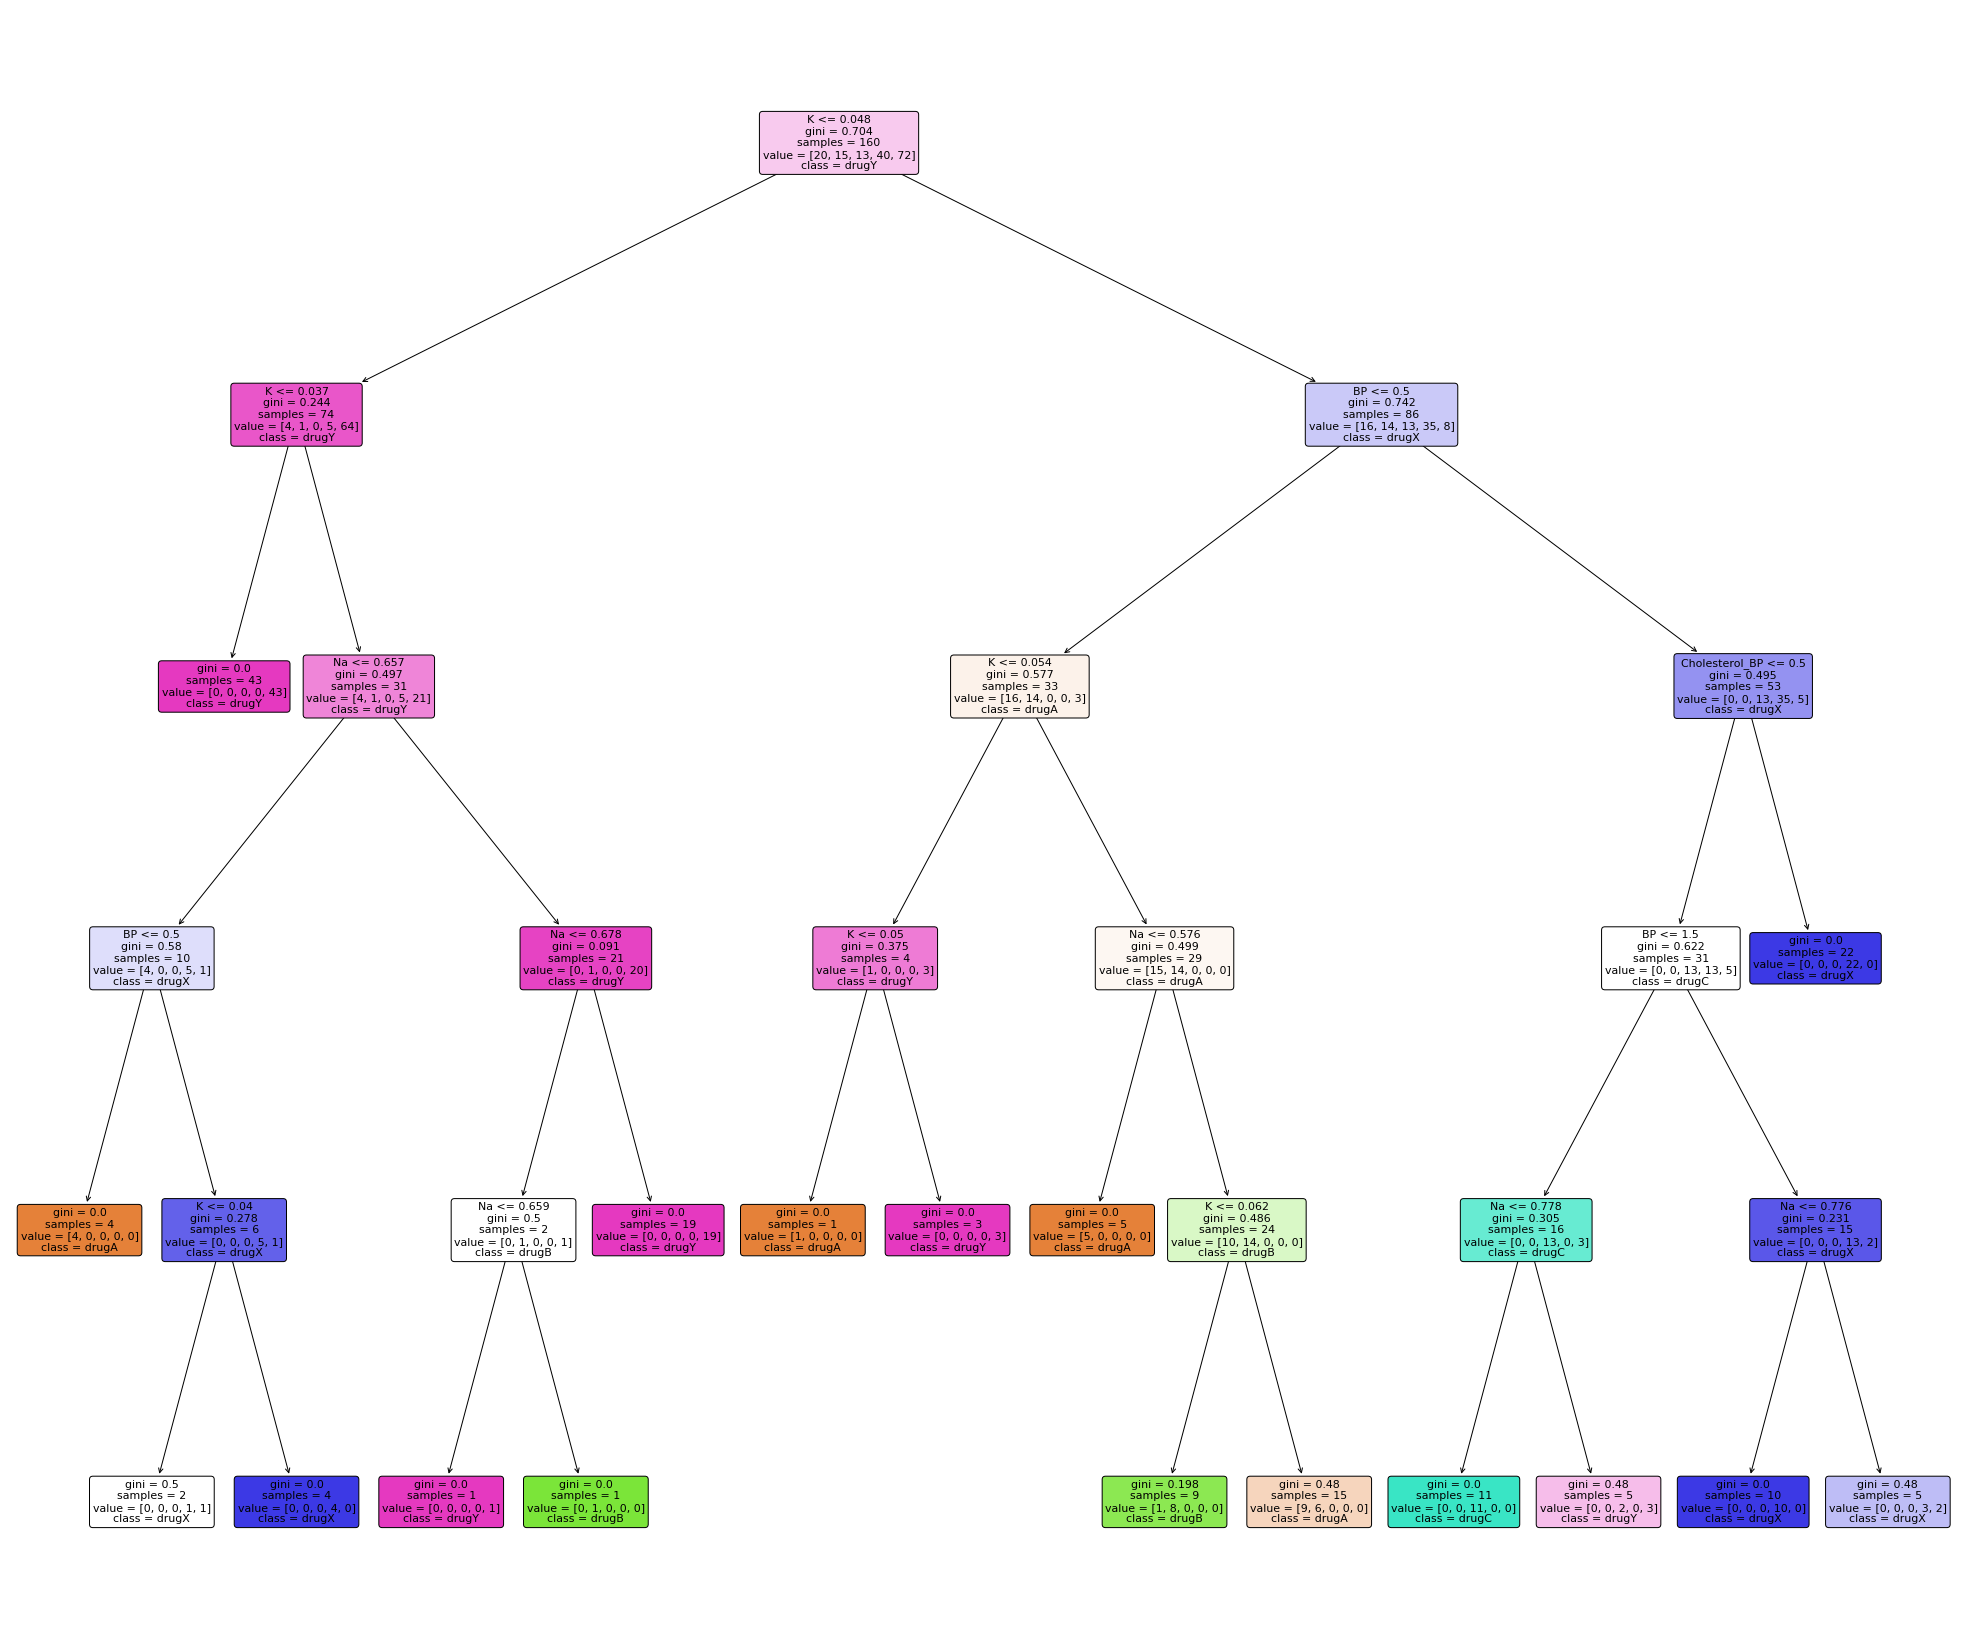

In [ ]:
fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(decision_tree, feature_names=df.columns , filled=True , class_names=cn , fontsize=11 , rounded=True )